In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
Fraud = pd.read_csv('Fraud_check.csv',index_col=0)

In [3]:
Fraud.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,Single,68833,50047,10,YES
YES,Divorced,33700,134075,18,YES
NO,Married,36925,160205,30,YES
YES,Single,50190,193264,15,YES
NO,Married,81002,27533,28,NO


In [4]:
##Converting the Taxable income variable to bucketing. 
Fraud["income"]="<=30000"
Fraud.loc[Fraud["Taxable.Income"]>=30000,"income"]="Good"
Fraud.loc[Fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [5]:
##Droping the Taxable income variable
Fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [6]:
Fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode


In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in Fraud.columns:
    if Fraud[column_name].dtype == object:
        Fraud[column_name] = le.fit_transform(Fraud[column_name])
    else:
        pass

In [8]:
##Splitting the data into featuers and labels
features = Fraud.iloc[:,0:4]
labels = Fraud.iloc[:,4]

In [9]:
## Collecting the column names
colnames = list(Fraud.columns)
predictors = colnames[0:4]
target = colnames[4]

In [10]:
##Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


In [11]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [12]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [13]:
model.n_outputs_

1

In [14]:
model.oob_score_

0.7291666666666666

In [15]:
##Predictions on train data
prediction = model.predict(x_train)

In [16]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [17]:
np.mean(prediction == y_train)

0.9875

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

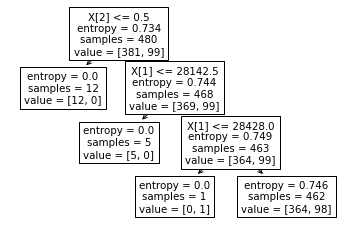

In [19]:
#PLot the decision tree
tree.plot_tree(model);

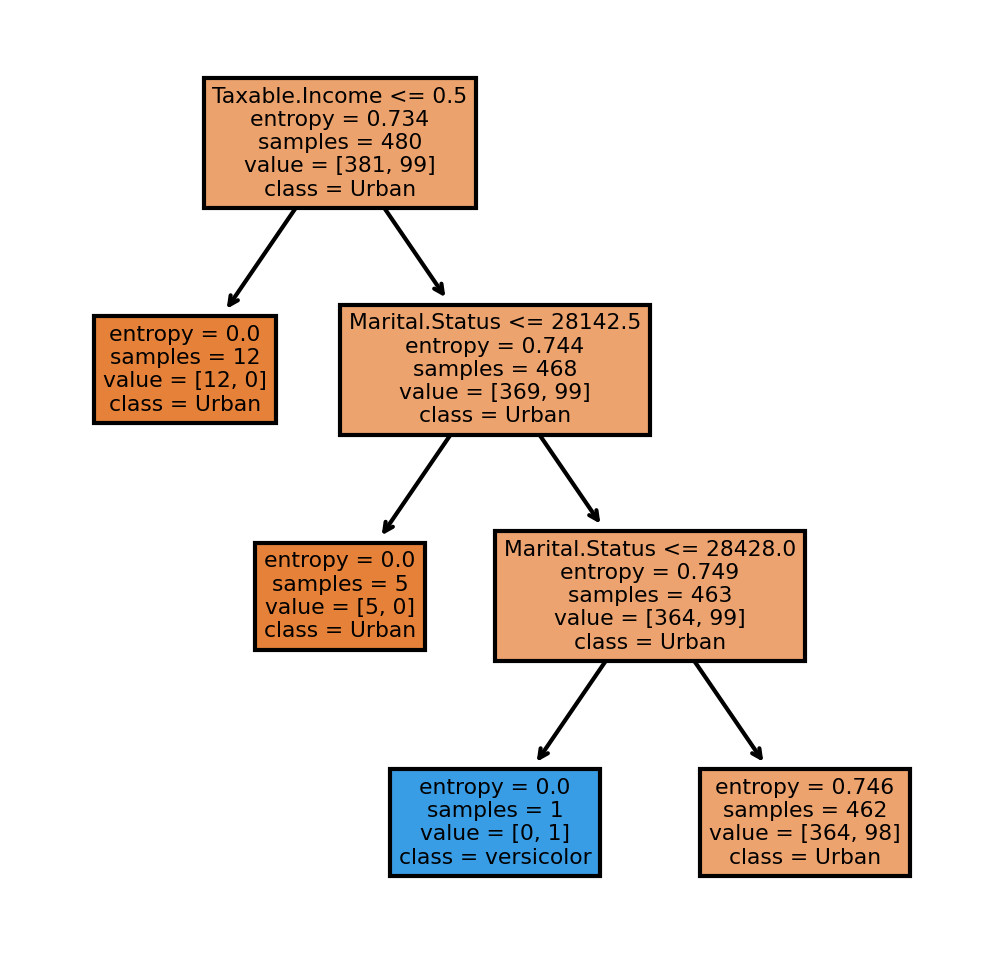

In [21]:
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience","Urban"]
cn=['Urban', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);